In [216]:
#se importan las librerias
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib qt

nm=1e-9
um=1e-6
mm=1e-3
cm=1e-2

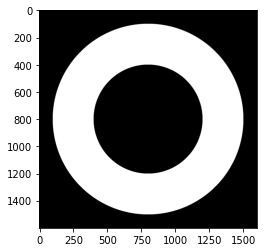

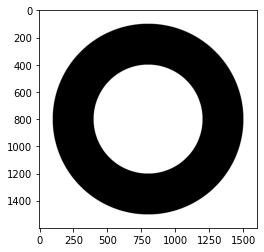

In [217]:
#Apertura circular
%matplotlib inline

radio =400
 
mask=np.zeros((1600,1600),dtype="uint8")
cv2.circle(mask,(800,800),700,1,-1)   #Radio de la apertura o es de 7000 um
cv2.circle(mask,(800,800),radio,0,-1)  #Radio del obstaculo es de x *10um
plt.imshow(mask,cmap="gray")
plt.show()


In [231]:
#Transformada de Fresnel FFT
def TrFr(entrada,z,dx_0,dy_0,W_l):
    #Contenido frecuencial de la imagen (transformada de fourier)
    k= 2*np.pi/W_l
    N,M= np.shape(entrada)
    x=np.arange(-int(N/2),int(N/2),1)
    y=np.arange(-int(M/2),int(M/2),1)
    X, Y=np.meshgrid(x,y)
    X0, Y0=np.meshgrid(x,y)

    #concidion de buen muestreo
    dx=(W_l*z)/(M*dx_0)
    dy=(W_l*z)/(N*dy_0)

    fx=X0*(1/(N*dx_0))
    fy=Y0*(1/(M*dy_0))
    
    #Constante de U_0
    C1= (1j*(k/(2*z)))
    U_1 = entrada*np.exp(C1*(((X*dx_0)**2) + ((Y*dy_0)**2)))
    U_2 = np.fft.fft2(U_1)

    #Constantes de U_2
    C2= ((np.exp(1j*k*z))/(1j*W_l*z))
    C3= 1j*(k/(2*z))

    U_3= U_2*C2*np.exp(C3*(((fx*dx)**2) + ((fy*dx)**2)))
    
    return np.fft.fftshift(U_3)
    


In [235]:
#Transformada de Fresnel FFT Modificada
def TrFrM(entrada,z,dx_0,dy_0,W_l):
    #Contenido frecuencial de la imagen (transformada de fourier)
    k= 2*np.pi/W_l
    N,M= np.shape(entrada)
    x=np.arange(-int(N/2),int(N/2),1)
    y=np.arange(-int(M/2),int(M/2),1)
    X, Y=np.meshgrid(x,y)
    X0, Y0=np.meshgrid(x,y)

    #concidion de buen muestreo
    dx=(W_l*z)/(M*dx_0)
    dy=(W_l*z)/(N*dy_0)

    fx=X0*(1/(N*dx_0))
    fy=Y0*(1/(M*dy_0))
    
    #Constante de U_0
    C1= (1j*(k/(2*z)))
    U_1 = entrada*np.exp(C1*(((X*dx)**2) + ((Y*dy)**2)))
    U_2 = np.fft.fft2(U_1)

    #Constantes de U_2
    C2= ((np.exp(1j*k*z))/(1j*W_l*z))
    C3= 1j*(k/(2*z))

    U_3= U_2*C2*np.exp(C3*(((fx*dx_0)**2) + ((fy*dx_0)**2)))
    
    return np.fft.fftshift(U_3)

In [220]:
# ESPECTRO ANGULAR POR FFT
def AngFT(entrada,z,dx,dy,wavelength):
    k=2*np.pi/wavelength
    U_0=entrada
    A_0=np.fft.fftshift(np.fft.fft2(U_0))
    N,M= np.shape(U_0)
    x=np.arange(-int(N/2),int(N/2),1)
    y=np.arange(-int(M/2),int(M/2),1)
    X, Y=np.meshgrid(x,y)

    #dimensiones de mundo en frecuencias
    fx=X*(1/(N*dx))
    fy=Y*(1/(M*dy))

    #transferencia
    H=np.exp(1j*k*z* np.emath.sqrt( 1 - (wavelength**2)*(fx**2+fy**2)  ))
    A_z=A_0*H
    U_z=np.fft.ifft2(A_z)
        
    return U_z


In [221]:
def NumZ(W_l,z,r):    
    R = ((r**2))/(W_l*z)
    return R     
def Radio(W_l,z,n):    
    R = np.sqrt(W_l*z*n)
    return R 
def separación(W_l,r,n):    
    R = ((r**2))/(W_l*n)
    return R 
def NumF(W_l,r,z):
    return ((2*r)**2)/(z*W_l)


print("Radio obstaculo:",Radio(633*nm,0.020,1264))
print("N zonas por obstaculo:",NumZ(633*nm,0.021,(radio*10*um)))
print(separación(633*nm,4*mm,1000))

print(NumF(633*nm,radio*10*um,0.02527646129541864))

print("Z limite:",(np.shape(mask)[0]*(1*um**2))/(633*nm))

Radio obstaculo: 0.004000279990200686
N zonas por obstaculo: 1203.6410140675541
0.02527646129541864
3999.9999999999995
Z limite: 0.0025276461295418644


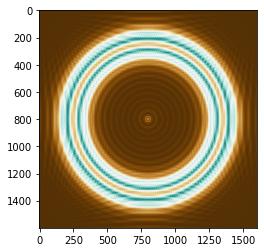

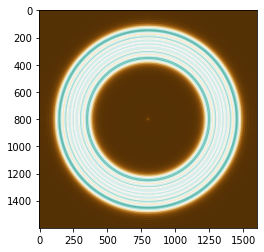

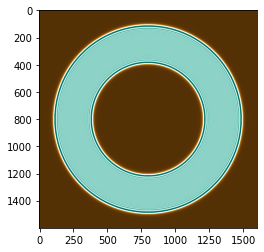

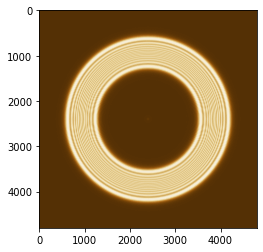

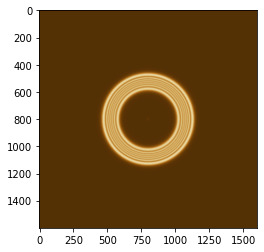

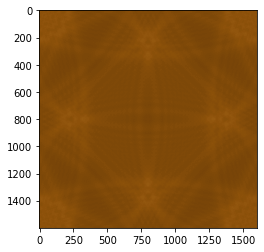

In [238]:
# Experimento de arago empelando Difracción angular y Transformada de fresnel a diferentes distancias

Z=0.002527646129541864
plt.imshow(np.abs(((AngFT(mask,Z*8,1*um,1*um,633*nm))))**2,cmap="BrBG")
plt.show()
plt.imshow(np.abs(((AngFT(mask,Z*2,1*um,1*um,633*nm))))**2,cmap="BrBG")
plt.show()
plt.imshow(np.abs(((AngFT(mask,Z/4,1*um,1*um,633*nm))))**2,cmap="BrBG")
plt.show()
plt.imshow(np.abs(((TrFrM(np.pad(mask,1600),Z*8,1*um,1*um,633*nm))))**2,cmap="BrBG")
plt.show()
plt.imshow(np.abs(((TrFr(mask,Z*2,1*um,1*um,633*nm))))**2,cmap="BrBG")
plt.show()
plt.imshow(np.abs(((TrFr(mask,Z/4,1*um,1*um,633*nm))))**2,cmap="BrBG")
plt.show()


